
**Data Visualization, Exploration, Pre-processing and cleaning**


1. Print 10 rows for sanity check to identify all the features present in the dataset
2. Split the data as per 70:30 ratios of training and test set.
3. Normalize the dataset and print 10 rows.


**Model Building**

1. Define a function to return k- nearest neighbors
2. Test the KNN Algorithm on the test dataset
3. Repeat the procedure with different values of K and find the best value.
4. Justify how we will choose the best value.





# **Data Visualization and Exploration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix


**Printed 10 rows for sanity check to identify all the features present in the dataset
and if the target matches with them.**

In [ ]:

#/content/KNN_Project
data = pd.read_csv('/content/KNN_Project',header=0, sep=',', engine='python')
#data.head()
data[0:10]

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1536.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1113.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1304.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1057.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1023.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
5,1587.993461,667.420121,2072.048544,364.624958,905.011385,2229.178514,880.442566,568.698408,645.719217,2156.949990,1
6,1497.293624,822.435853,908.059366,671.797517,1280.270442,1910.066313,1052.812386,713.757499,703.951632,1088.493788,0
7,1172.820769,1166.958461,455.656588,445.572745,1109.894585,1045.551452,1301.821786,264.940137,945.023932,2307.922229,0
8,839.494647,1089.747059,653.699894,659.334590,1529.725972,1521.320489,1401.676227,433.025043,1289.063583,1690.149835,0
9,1028.689140,202.089774,1030.841860,429.109102,943.104815,1978.506855,653.178512,753.655291,1336.375960,1057.864848,1


In [ ]:
#data.info()
# Checking for missing values in the dataset
data.isnull().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

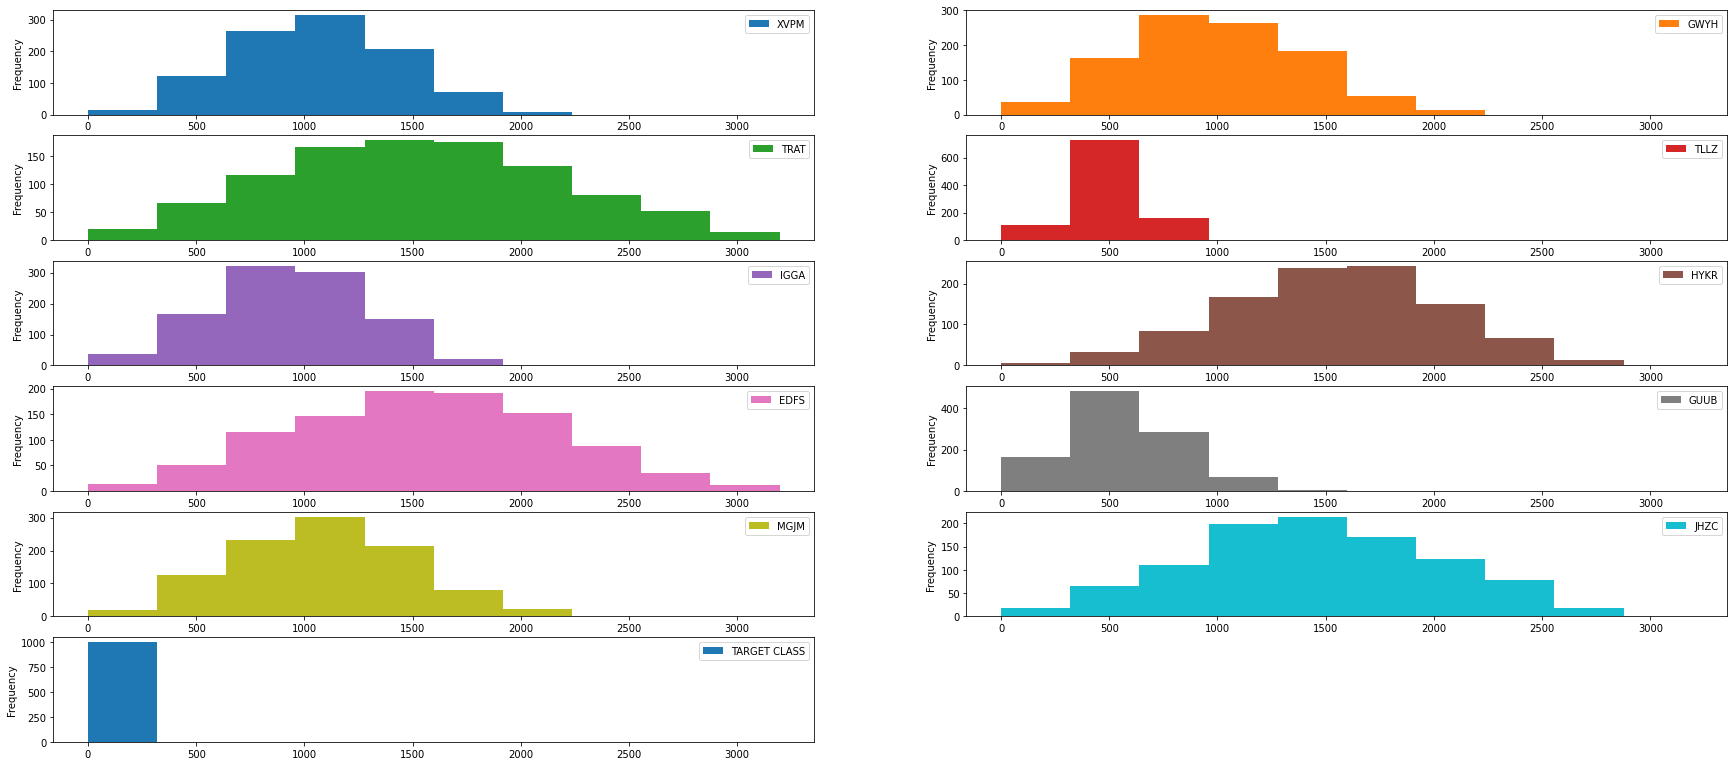

In [ ]:
#for var in data.columns:
    #print(data[var].value_counts())

# plot histograms of the variables


plt.rcParams['figure.figsize']=(30,25)

data.plot(kind='hist', bins=10, subplots=True, layout=(11,2), sharex=False, sharey=False)

plt.show()

In [ ]:
correlation = data.corr()
correlation['TARGET CLASS'].sort_values(ascending=False)

TARGET CLASS    1.000000
TRAT            0.489347
IGGA            0.295390
EDFS            0.281607
HYKR           -0.015266
XVPM           -0.079384
MGJM           -0.098887
TLLZ           -0.172029
GUUB           -0.174496
JHZC           -0.301725
GWYH           -0.416168
Name: TARGET CLASS, dtype: float64

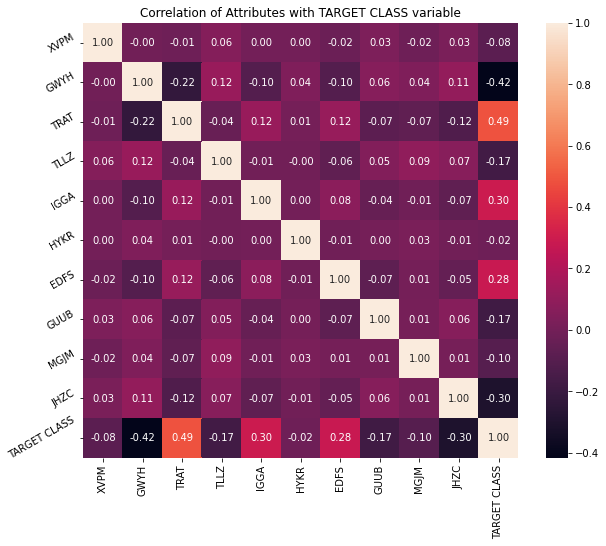

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with TARGET CLASS variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
#Declare feature vector and target variable
X = data.drop(['TARGET CLASS'], axis=1)
y = data['TARGET CLASS']

# **Split data as per 70:30 ratios into separate training and test set**

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42, stratify=y)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((700, 10), (300, 10))

#**Normalize the dataset(Feature Scaling) and print 10 rows**

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
#X_train.head()
X_train[0:10]

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-1.050099,-1.590008,0.560002,-0.939925,0.869873,-0.988528,0.621518,1.160447,-0.823604,-1.342466
1,-0.128232,0.845846,-0.935355,1.616972,-0.280001,-0.350613,-1.101391,0.370455,-1.360914,0.772407
2,0.949358,-0.959603,-0.129135,-1.918256,-1.273641,0.666140,-0.250390,-1.378262,0.020449,0.628012
3,1.389625,-0.302111,1.650329,-0.559277,0.395201,-0.694751,1.930771,2.521367,0.786871,0.090680
4,1.267749,-0.798603,0.034263,0.646891,-0.158603,-0.943348,0.655156,0.112266,-0.217217,-2.257504
5,1.102390,-1.767463,0.421917,-0.834479,-0.452094,-1.522350,0.323857,0.310846,-0.056759,-1.730535
6,-0.478009,-0.348454,0.742513,-1.328889,0.012833,0.018543,-1.161879,-2.068794,-0.731678,-0.353998
7,0.582565,-1.951171,-0.834169,-2.024102,0.696837,0.836935,0.335223,0.305315,0.323688,-0.353593
8,1.254311,0.085883,-0.731367,-2.113031,-1.440494,-0.777172,1.874654,0.659029,0.353058,-1.128675
9,0.227702,-1.215063,0.502242,0.254671,0.809349,0.370899,-0.879803,-0.918564,-1.078273,-1.124068


#**Define a function to return k- nearest neighbors**

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
def KNNAlgorithmNearestNeighbour(k):
  knn = KNeighborsClassifier(n_neighbors=k)
  #Fit the model
  knn.fit(X_train.values,y_train)
  return knn


#**Test the KNN Algorithm on the test dataset**

In [ ]:
knn = KNNAlgorithmNearestNeighbour(3)
#Get accuracy
knn.score(X_test.values,y_test)

0.81

#**Repeat the procedure with different values of K and find the best value.**

In [ ]:
knn = KNNAlgorithmNearestNeighbour(4)
#Get accuracy
knn.score(X_test.values,y_test)

0.8033333333333333

In [ ]:
knn = KNNAlgorithmNearestNeighbour(5)
#Get accuracy
knn.score(X_test.values,y_test)

In [ ]:
knn = KNNAlgorithmNearestNeighbour(8)
#Get accuracy
knn.score(X_test.values,y_test)

0.8466666666666667

In [ ]:
knn = KNNAlgorithmNearestNeighbour(10)
#Get accuracy
knn.score(X_test.values,y_test)

0.8533333333333334

#**Let us first observe the accuracies for different values of k & return k with maximum accuracy on training and test dataset.**

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train.values, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train.values, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test.values, y_test)


#**As we can see for k = 10 accuracy comes around 85.33% and then it remains the same even we change the k > 10 hence we can see from below chart that it's converging towards same accuracy at k = 10. Hence that's how we can get choose the best K values**

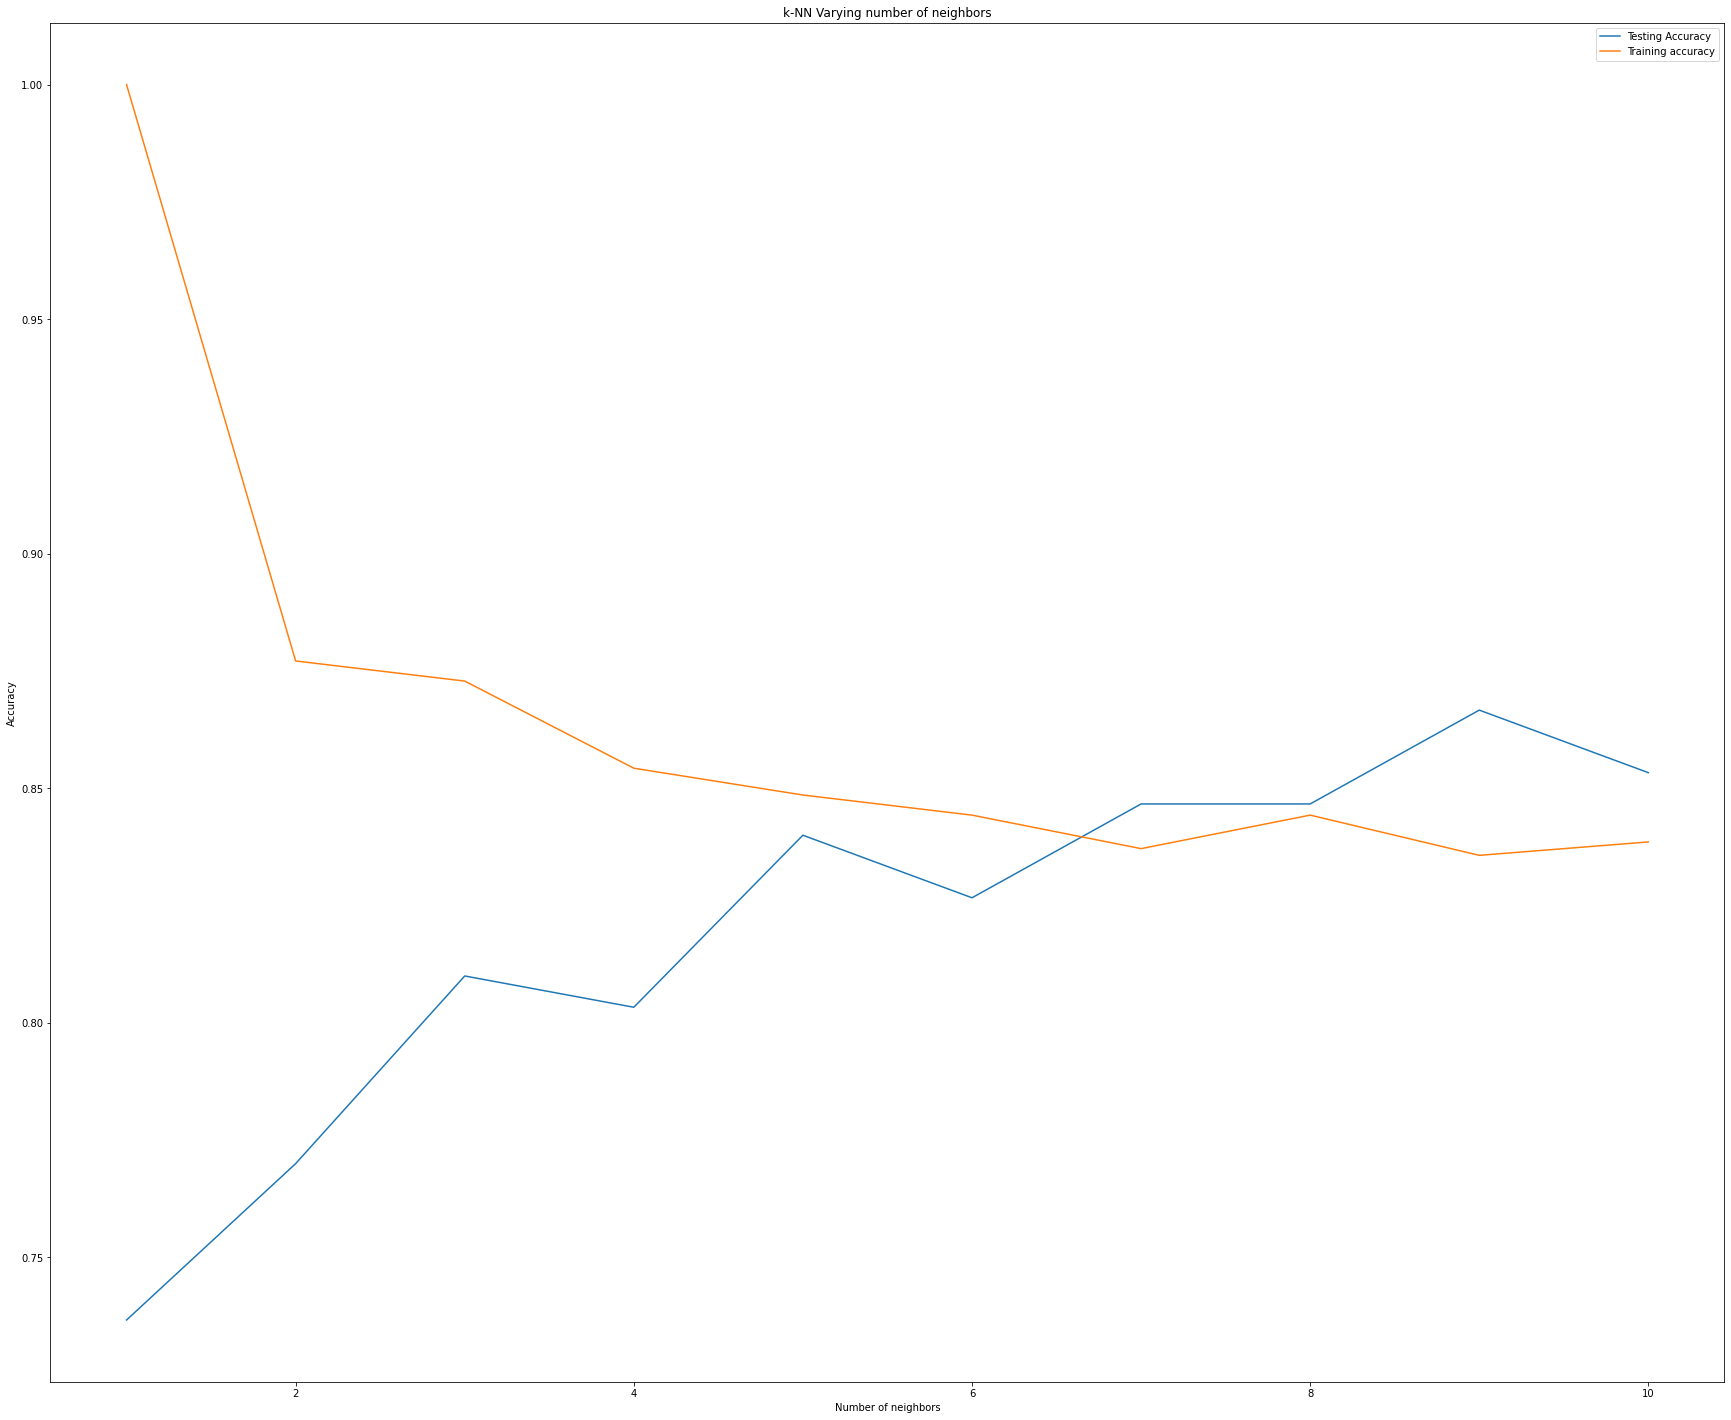

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/Group50_KNN.ipynb

[NbConvertApp] Converting notebook /content/Group50_KNN.ipynb to html
[NbConvertApp] Writing 549719 bytes to /content/Group50_KNN.html
